In [1]:
import torch

In [2]:
# Install dependencies
!pip install supervision==0.3.0


In [3]:
import supervision as sv
import transformers

sv.__version__ , transformers.__version__

('0.3.0', '4.57.1')

In [4]:
!pip install pytorch-lightning


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 831.6/831.6 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 44.8 MB/s eta 0:00:00


In [5]:
import pytorch_lightning
print(pytorch_lightning.__version__)

2.5.6


In [6]:
!pip install timm
!pip install cython
!pip install pycocotools
!pip install scipy

In [7]:
import os
import torchvision
from transformers import DetrImageProcessor
image_processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/290 [00:00<?, ?B/s]

In [8]:
!ls

'bone fracture.v2-release.coco.zip'   sample_data


In [12]:
import zipfile

with zipfile.ZipFile("/content/bone fracture.v2-release.coco.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/bone_fracture_dataset")

print("✅ Dataset extracted successfully!")
print(os.listdir("/content/bone_fracture_dataset"))


✅ Dataset extracted successfully!
['README.dataset.txt', 'train', 'README.roboflow.txt', 'test', 'valid']


In [13]:
import os
print(os.getcwd())           # shows your current working directory
print(os.listdir("."))

/content
['.config', 'bone fracture.v2-release.coco.zip', 'bone_fracture_dataset', 'sample_data']


In [14]:
import os
os.listdir("/content/bone_fracture_dataset/valid")


['103_jpg.rf.ad02f2dbb977217b7248a83b353405bb.jpg',
 '8_jpg.rf.1a2c67587b5266449e319b6682d062a4.jpg',
 '60_jpg.rf.7fd5e6f781bc8ad9dca4cd346ce5eee6.jpg',
 '218_jpg.rf.73f3693a52e982c7d5797f924162c000.jpg',
 '95_jpg.rf.6a04b604d5063510df9cd67b761ea40b.jpg',
 '204_jpg.rf.93a322539d8162348f6403fe7ccd9455.jpg',
 '170_jpg.rf.2f4eff20b8deccb17f9bb8b9d4a00872.jpg',
 '129_jpg.rf.29abf0d991fb965243fd5cd7823cd796.jpg',
 '245_jpg.rf.c0a55ea542141d6e0611cea6c3f482d9.jpg',
 '197_jpg.rf.37187a78b29dc692e76570581029e94e.jpg',
 '15_jpg.rf.d611278294c9b782e07d808622196ff4.jpg',
 '66_jpg.rf.6b84be765e28fae7e8014510f287926a.jpg',
 '68_jpg.rf.5675839f44704b3c3e1dac1c0e896044.jpg',
 '84_jpg.rf.54d2ec8d8a11164adb8b81fa06f2150f.jpg',
 '220_jpg.rf.fe20bed6a74de77be4ae9978362af8db.jpg',
 '21_jpg.rf.f13583e8b330c9f0644d0ab7405a4fd4.jpg',
 '91_jpg.rf.c1b726bceb3d0a2e6b2450fe88fac3d7.jpg',
 '15_jpg.rf.b14b80cfd93985d521b53ba2d92da225.jpg',
 '199_jpg.rf.a60ccd6e6b0378330bdb457db028c2f1.jpg',
 '95_jpg.rf.3bc7e20d89e

In [15]:
import os
print(os.listdir("/content/bone_fracture_dataset/train")[:5])
print(os.listdir("/content/bone_fracture_dataset/valid")[:5])
print(os.listdir("/content/bone_fracture_dataset/test")[:5])


['36_jpg.rf.d77fed55a878f4737b21b82daf0ad36e.jpg', '9_jpg.rf.12bcc2f1fc94c8eeca8802e738c1ed57.jpg', '13_jpg.rf.1cd849e707da82a181cac2dc521d20af.jpg', '224_jpg.rf.d9118d4e7aee46440f44f9fac3b5e386.jpg', '4_jpg.rf.f29358be36e532da6d920f7fdb5445c7.jpg']
['103_jpg.rf.ad02f2dbb977217b7248a83b353405bb.jpg', '8_jpg.rf.1a2c67587b5266449e319b6682d062a4.jpg', '60_jpg.rf.7fd5e6f781bc8ad9dca4cd346ce5eee6.jpg', '218_jpg.rf.73f3693a52e982c7d5797f924162c000.jpg', '95_jpg.rf.6a04b604d5063510df9cd67b761ea40b.jpg']
['16_jpg.rf.0ef960d157f3f332421d9d5a8248a00f.jpg', '205_jpg.rf.b30bdf73b6009d15a54011fd1acab0d0.jpg', '11_jpg.rf.8e1c22ba2779121f3ba0a8ae03a20407.jpg', '173_jpg.rf.7bcde8912d29eb7f5409d79c922924cd.jpg', '105_jpg.rf.3cde2fcd15a9bdf6a2d2d32aff48f33d.jpg']


In [16]:
import os
import torchvision

dataset = 'bone fracture.v2-release.coco'   # keep variable name the same

ANNOTATION_FILE_NAME = "_annotations.coco.json"
TRAIN_DIRECTORY = os.path.join("/content/bone_fracture_dataset/train")     # point to the real train folder
VAL_DIRECTORY   = os.path.join("/content/bone_fracture_dataset/valid")
TEST_DIRECTORY  = os.path.join("/content/bone_fracture_dataset/test")


class CocoDetection(torchvision.datasets.CocoDetection):
    def __init__(
        self,
        image_directory_path: str,
        image_processor,
        train: bool = True
    ):
        # for each split, use its own annotation file
        annotation_file_path = os.path.join(image_directory_path, ANNOTATION_FILE_NAME)
        super(CocoDetection, self).__init__(image_directory_path, annotation_file_path)
        self.image_processor = image_processor

    def __getitem__(self, idx):
        images, annotations = super(CocoDetection, self).__getitem__(idx)
        image_id = self.ids[idx]
        annotations = {'image_id': image_id, 'annotations': annotations}
        encoding = self.image_processor(images=images,
                                        annotations=annotations,
                                        return_tensors="pt")
        pixel_values = encoding["pixel_values"].squeeze()
        target = encoding["labels"][0]
        return pixel_values, target


# Datasets
TRAIN_DATASET = CocoDetection(image_directory_path=TRAIN_DIRECTORY,
                              image_processor=image_processor,
                              train=True)

VAL_DATASET   = CocoDetection(image_directory_path=VAL_DIRECTORY,
                              image_processor=image_processor,
                              train=False)

TEST_DATASET  = CocoDetection(image_directory_path=TEST_DIRECTORY,
                               image_processor=image_processor,
                               train=False)

print("Number of training examples:", len(TRAIN_DATASET))
print("Number of validation examples:", len(VAL_DATASET))
print("Number of test examples:", len(TEST_DATASET))


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Number of training examples: 326
Number of validation examples: 88
Number of test examples: 44


Image #142


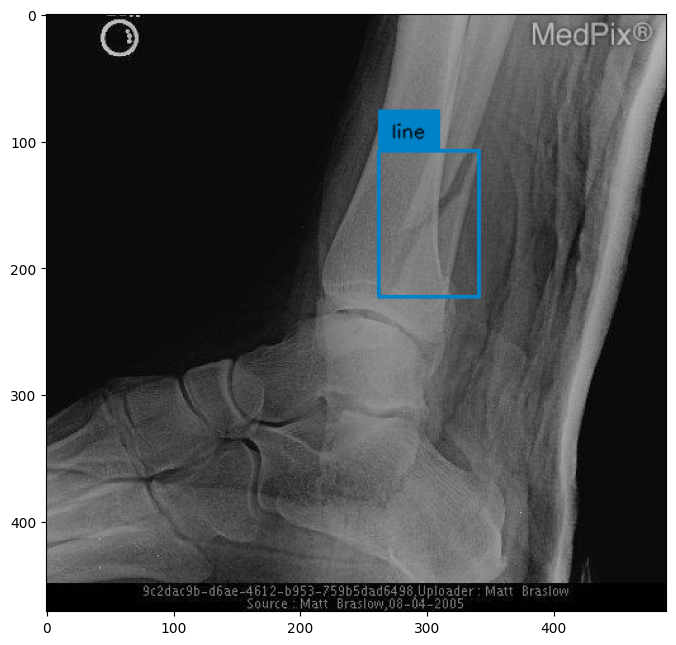

In [17]:
# Visualize if dataset is loaded properly

import random
import cv2
import numpy as np


# select random image
image_ids = TRAIN_DATASET.coco.getImgIds()
image_id = random.choice(image_ids)
print('Image #{}'.format(image_id))

# load image and annotatons
image = TRAIN_DATASET.coco.loadImgs(image_id)[0]
annotations = TRAIN_DATASET.coco.imgToAnns[image_id]
image_path = os.path.join(TRAIN_DATASET.root, image['file_name'])
image = cv2.imread(image_path)

# annotate
detections = sv.Detections.from_coco_annotations(coco_annotation=annotations)

# we will use id2label function for training
categories = TRAIN_DATASET.coco.cats
id2label = {k: v['name'] for k,v in categories.items()}

labels = [
    f"{id2label[class_id]}"
    for _, _, class_id, _
    in detections
]

box_annotator = sv.BoxAnnotator()
frame = box_annotator.annotate(scene=image, detections=detections, labels=labels)

%matplotlib inline
sv.show_frame_in_notebook(image, (8, 8))

Image #263


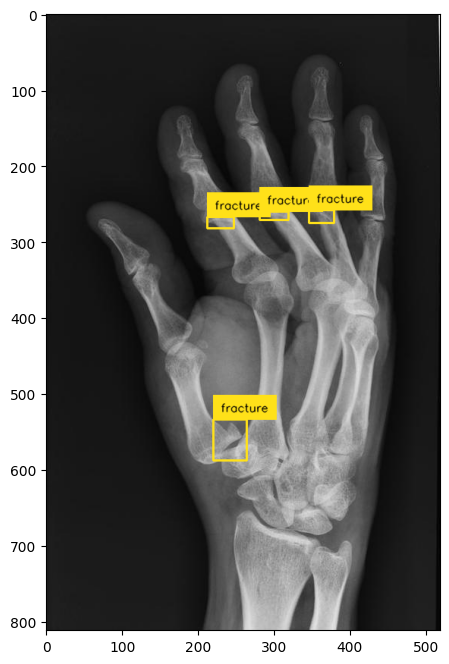

In [18]:
# Visualize if dataset is loaded properly

import random
import cv2
import numpy as np


# select random image
image_ids = TRAIN_DATASET.coco.getImgIds()
image_id = random.choice(image_ids)
print('Image #{}'.format(image_id))

# load image and annotatons
image = TRAIN_DATASET.coco.loadImgs(image_id)[0]
annotations = TRAIN_DATASET.coco.imgToAnns[image_id]
image_path = os.path.join(TRAIN_DATASET.root, image['file_name'])
image = cv2.imread(image_path)

# annotate
detections = sv.Detections.from_coco_annotations(coco_annotation=annotations)

# we will use id2label function for training
categories = TRAIN_DATASET.coco.cats
id2label = {k: v['name'] for k,v in categories.items()}

labels = [
    f"{id2label[class_id]}"
    for _, _, class_id, _
    in detections
]

box_annotator = sv.BoxAnnotator()
frame = box_annotator.annotate(scene=image, detections=detections, labels=labels)

%matplotlib inline
sv.show_frame_in_notebook(image, (8, 8))

In [19]:
from torch.utils.data import DataLoader

def collate_fn(batch):
    pixel_values = [item[0] for item in batch]
    encoding = image_processor.pad(pixel_values, return_tensors="pt")
    labels = [item[1] for item in batch]
    return {
        'pixel_values': encoding['pixel_values'],
        'pixel_mask': encoding['pixel_mask'],
        'labels': labels
    }

TRAIN_DATALOADER = DataLoader(dataset=TRAIN_DATASET, collate_fn=collate_fn, batch_size=4, shuffle=True)
VAL_DATALOADER = DataLoader(dataset=VAL_DATASET, collate_fn=collate_fn, batch_size=4)
TEST_DATALOADER = DataLoader(dataset=TEST_DATASET, collate_fn=collate_fn, batch_size=4)

In [20]:
import pytorch_lightning as pl
from transformers import DetrForObjectDetection
import torch


class Detr(pl.LightningModule):

    def __init__(self, lr, lr_backbone, weight_decay):
        super().__init__()
        self.model = DetrForObjectDetection.from_pretrained(
            pretrained_model_name_or_path="facebook/detr-resnet-50",
            num_labels=len(id2label),
            ignore_mismatched_sizes=True
        )

        self.lr = lr
        self.lr_backbone = lr_backbone
        self.weight_decay = weight_decay

    def forward(self, pixel_values, pixel_mask):
        return self.model(pixel_values=pixel_values, pixel_mask=pixel_mask)

    def common_step(self, batch, batch_idx):
        pixel_values = batch["pixel_values"]
        pixel_mask = batch["pixel_mask"]
        labels = [{k: v.to(self.device) for k, v in t.items()} for t in batch["labels"]]

        outputs = self.model(pixel_values=pixel_values, pixel_mask=pixel_mask, labels=labels)

        loss = outputs.loss
        loss_dict = outputs.loss_dict

        return loss, loss_dict

    def training_step(self, batch, batch_idx):
        loss, loss_dict = self.common_step(batch, batch_idx)
        # logs metrics for each training_step, and the average across the epoch
        self.log("training_loss", loss)
        for k,v in loss_dict.items():
            self.log("train_" + k, v.item())

        return loss

    def validation_step(self, batch, batch_idx):
        loss, loss_dict = self.common_step(batch, batch_idx)
        self.log("validation/loss", loss)
        for k, v in loss_dict.items():
            self.log("validation_" + k, v.item())

        return loss

    def configure_optimizers(self):
        # DETR authors decided to use different learning rate for backbone
        # you can learn more about it here:
        # - https://github.com/facebookresearch/detr/blob/3af9fa878e73b6894ce3596450a8d9b89d918ca9/main.py#L22-L23
        # - https://github.com/facebookresearch/detr/blob/3af9fa878e73b6894ce3596450a8d9b89d918ca9/main.py#L131-L139
        param_dicts = [
            {
                "params": [p for n, p in self.named_parameters() if "backbone" not in n and p.requires_grad]},
            {
                "params": [p for n, p in self.named_parameters() if "backbone" in n and p.requires_grad],
                "lr": self.lr_backbone,
            },
        ]
        return torch.optim.AdamW(param_dicts, lr=self.lr, weight_decay=self.weight_decay)

    def train_dataloader(self):
        return TRAIN_DATALOADER


In [21]:
model = Detr(lr=1e-4, lr_backbone=1e-5, weight_decay=1e-4)

batch = next(iter(TRAIN_DATALOADER))
outputs = model(pixel_values=batch['pixel_values'], pixel_mask=batch['pixel_mask'])

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py:2441: UserWarning: for conv1.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py:2441: UserWarning: for bn1.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py:2441: UserWarning: for bn1.bias: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pas

In [22]:
from pytorch_lightning import Trainer

# settings
MAX_EPOCHS = 45

trainer = Trainer( max_epochs=MAX_EPOCHS, gradient_clip_val=0.1, accumulate_grad_batches=8, log_every_n_steps=5)

trainer.fit(model)

INFO:pytorch_lightning.utilities.rank_zero:💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
/usr/local/lib/python3.12/dist-packages/pytorch_lightning/trainer/configuration_validator.py:70: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type                   | Params | Mode
--------------------------------------------------------
0 | model | DetrForObjectDetection | 41.5 M | eval
--------------------------------------------------------
41.3 M    Trainable params
222 K     Non-trainable params
41.

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=45` reached.


In [23]:
import torch

# Specify the device
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [24]:
MODEL_PATH = 'custom-model'
model.model.save_pretrained(MODEL_PATH)

# loading model
model = DetrForObjectDetection.from_pretrained(MODEL_PATH)
model.to(DEVICE)

DetrForObjectDetection(
  (model): DetrModel(
    (backbone): DetrConvModel(
      (conv_encoder): DetrConvEncoder(
        (model): FeatureListNet(
          (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
          (bn1): DetrFrozenBatchNorm2d()
          (act1): ReLU(inplace=True)
          (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
          (layer1): Sequential(
            (0): Bottleneck(
              (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
              (bn1): DetrFrozenBatchNorm2d()
              (act1): ReLU(inplace=True)
              (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn2): DetrFrozenBatchNorm2d()
              (drop_block): Identity()
              (act2): ReLU(inplace=True)
              (aa): Identity()
              (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      

In [25]:

import os
import torchvision

class CocoDetection(torchvision.datasets.CocoDetection):
    def __init__(
        self,
        image_directory_path: str,
        image_processor,
        train: bool = True
    ):
        # Always look for the annotation file inside the given image folder
        annotation_file_path = os.path.join(image_directory_path, "_annotations.coco.json")

        # Safety check
        if not os.path.exists(annotation_file_path):
            raise FileNotFoundError(f"❌ Annotation file not found at: {annotation_file_path}")

        super(CocoDetection, self).__init__(image_directory_path, annotation_file_path)
        self.image_processor = image_processor

    def __getitem__(self, idx):
        images, annotations = super(CocoDetection, self).__getitem__(idx)
        image_id = self.ids[idx]
        annotations = {'image_id': image_id, 'annotations': annotations}
        encoding = self.image_processor(images=images, annotations=annotations, return_tensors="pt")
        pixel_values = encoding["pixel_values"].squeeze()
        target = encoding["labels"][0]
        return pixel_values, target

TRAIN_DIRECTORY = "/content/bone_fracture_dataset/train"
VAL_DIRECTORY   = "/content/bone_fracture_dataset/valid"
TEST_DIRECTORY  = "/content/bone_fracture_dataset/test"

TRAIN_DATASET = CocoDetection(TRAIN_DIRECTORY, image_processor, train=True)
VAL_DATASET   = CocoDetection(VAL_DIRECTORY, image_processor, train=False)
TEST_DATASET  = CocoDetection(TEST_DIRECTORY, image_processor, train=False)


loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [26]:
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt


# utils
categories = TEST_DATASET.coco.cats
id2label = {k: v['name'] for k,v in categories.items()}
box_annotator = sv.BoxAnnotator()
print(categories)
# select random image
image_ids = TEST_DATASET.coco.getImgIds()
print(image_ids)
image_id = random.choice(image_ids)
print('Image #{}'.format(image_id))


{0: {'id': 0, 'name': 'bone-fracture', 'supercategory': 'none'}, 1: {'id': 1, 'name': 'angle', 'supercategory': 'bone-fracture'}, 2: {'id': 2, 'name': 'fracture', 'supercategory': 'bone-fracture'}, 3: {'id': 3, 'name': 'line', 'supercategory': 'bone-fracture'}, 4: {'id': 4, 'name': 'messed_up_angle', 'supercategory': 'bone-fracture'}}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]
Image #29


In [27]:
image = TEST_DATASET.coco.loadImgs(image_id)[0]

print(image)

annotations = TEST_DATASET.coco.imgToAnns[image_id]

image_path = os.path.join(TEST_DATASET.root, image['file_name'])

image = cv2.imread(image_path)


{'id': 29, 'license': 1, 'file_name': '31_jpg.rf.887c2f4daf5684fd355b6574d2eca7aa.jpg', 'height': 1965, 'width': 2126, 'date_captured': '2022-08-30T09:40:29+00:00'}


In [28]:

dataset = 'bone_fracture_dataset'

ANNOTATION_FILE_NAME = "test/_annotations.coco.json"

TEST_DIRECTORY = os.path.join(dataset, "test")


class CocoDetection(torchvision.datasets.CocoDetection):
    def __init__(
        self,
        image_directory_path: str,
        image_processor,
        train: bool = True
    ):
        annotation_file_path = os.path.join(dataset,ANNOTATION_FILE_NAME);
        super(CocoDetection, self).__init__(image_directory_path, annotation_file_path)
        self.image_processor = image_processor

    def __getitem__(self, idx):
        images, annotations = super(CocoDetection, self).__getitem__(idx)
        image_id = self.ids[idx]
        annotations = {'image_id': image_id, 'annotations': annotations}
        encoding = self.image_processor(images=images, annotations=annotations, return_tensors="pt")
        pixel_values = encoding["pixel_values"].squeeze()
        target = encoding["labels"][0]

        return pixel_values, target


TEST_DATASET = CocoDetection(image_directory_path=TEST_DIRECTORY, image_processor=image_processor, train=False)


print("Number of test examples:", len(TEST_DATASET))

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Number of test examples: 44


[[[ 19  19  19]
  [ 45  45  45]
  [ 33  33  33]
  ...
  [ 38  38  38]
  [ 42  42  42]
  [ 46  46  46]]

 [[ 61  61  61]
  [111 111 111]
  [118 118 118]
  ...
  [124 124 124]
  [127 127 127]
  [129 129 129]]

 [[ 67  67  67]
  [128 128 128]
  [140 140 140]
  ...
  [162 162 162]
  [164 164 164]
  [165 165 165]]

 ...

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [  1   1   1]
  [  1   1   1]
  [  1   1   1]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [  1   1   1]
  [  1   1   1]
  [  1   1   1]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [  1   1   1]
  [  1   1   1]
  [  1   1   1]]]


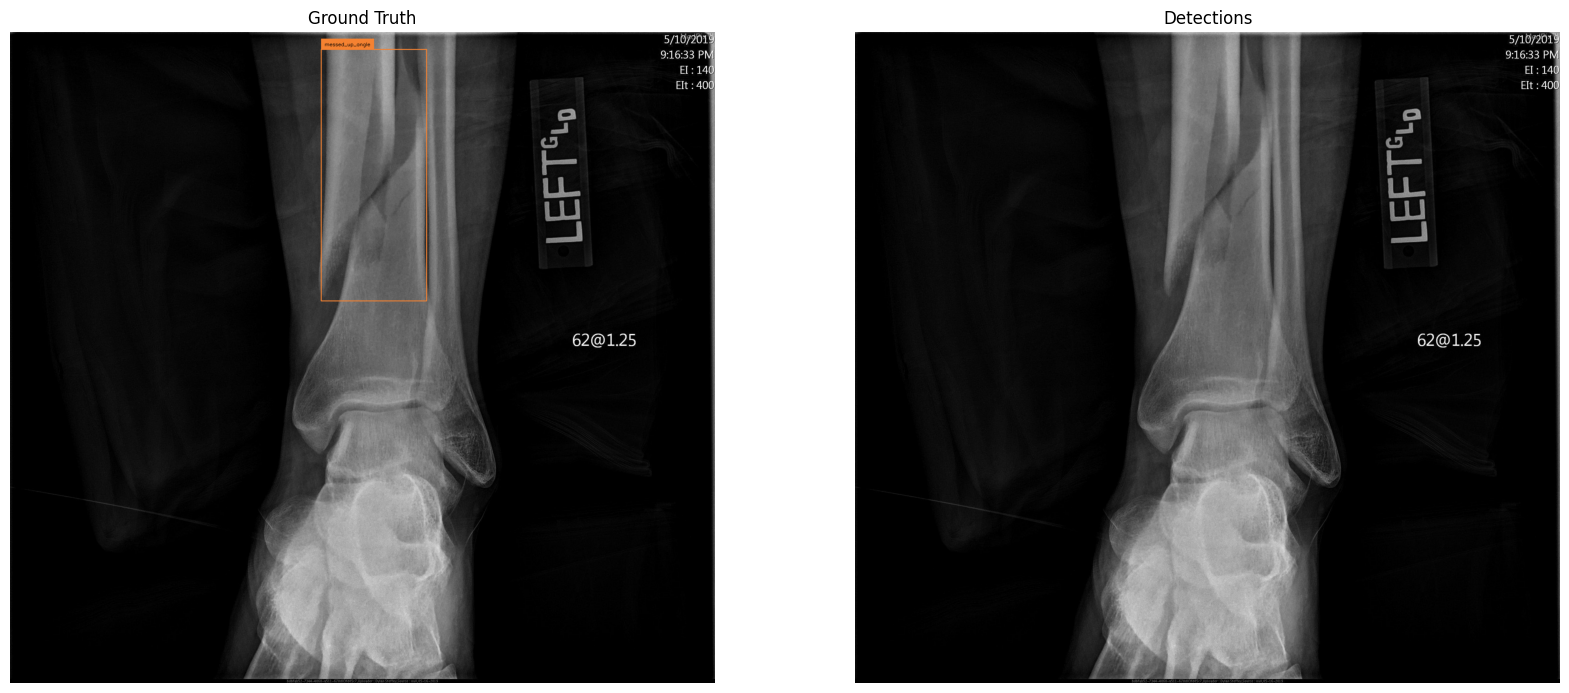

In [29]:

# Annotate ground truth
detections = sv.Detections.from_coco_annotations(coco_annotation=annotations)
labels = [f"{id2label[class_id]}" for _, _, class_id, _ in detections]
print(image)
frame_ground_truth = box_annotator.annotate(scene=image.copy(), detections=detections, labels=labels)
CONFIDENCE_TRESHOLD = 0.1


# Annotate detections
with torch.no_grad():

    # load image and predict
    inputs = image_processor(images=image, return_tensors='pt').to(DEVICE)
    outputs = model(**inputs)

    # post-process
    target_sizes = torch.tensor([image.shape[:2]]).to(DEVICE)
    results = image_processor.post_process_object_detection(
        outputs=outputs,
        threshold=CONFIDENCE_TRESHOLD,
        target_sizes=target_sizes
    )[0]


    detections = sv.Detections.from_transformers(transformers_results=results)
    labels = [f"{id2label[class_id]} {confidence:.2f}" for _, confidence, class_id, _ in detections]
    frame_detections = box_annotator.annotate(scene=image.copy(), detections=detections, labels=labels)


# %matplotlib inline # Remove this line, we won't use it anymore

# Combine both images side by side and display
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].imshow(cv2.cvtColor(frame_ground_truth, cv2.COLOR_BGR2RGB))
axs[0].axis('off')
axs[0].set_title('Ground Truth')

axs[1].imshow(cv2.cvtColor(frame_detections, cv2.COLOR_BGR2RGB))
axs[1].axis('off')
axs[1].set_title('Detections')

plt.show()


In [30]:
from transformers import DetrImageProcessor, DetrForObjectDetection
import torch
from PIL import Image
import requests

# Load the model and processor
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50")
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50")

# Load an image
image = Image.open("/content/bone_fracture_dataset/test/117_jpg.rf.119dccd2483b04d8d3a8c33a1393d362.jpg")

# Preprocess the image
inputs = processor(images=image, return_tensors="pt")

# Perform object detection
outputs = model(**inputs)

# Post-process the results (e.g., draw bounding boxes around detected fractures)
# You can visualize the output or save it for further analysis

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
